In [1]:
import os
import numpy as np
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt

In [3]:
def get_latent_theta(adata: ad.AnnData) -> np.ndarray:
    X = adata.obsm['X_latent']
    theta = -np.arctan2(-X[:, 1], X[:, 0]) + np.pi
    return theta

In [2]:
adata = sc.read_h5ad(os.path.join('..', 'data', 'modeling', 'testing_latent.h5ad'))
adata

AnnData object with n_obs × n_vars = 1434229 × 723
    obs: 'sample', 'cell_type', 'complexity', 'umap1', 'umap2', 'g1s_score', 'g2m_score', 'cell_cycle_phase', 'mp_top_score', 'mp_top', 'mp_assignment', 'ebv', 'Title', 'Category', 'Disease', 'Technology', 'Samples', 'Cells ', 'Name', 'patient', 'cell_subtype', 'source', 'disease', 'p16_status', 'site', 't_stage', 'n_stage', 'gender', 'race', 'age', 'tobacco_use', 'alcohol_use', 'hpv', 'hpv_score', 'treatment', 'procedure', 'sorting', 'cluster', 'malignant', 'sample_id', 'cell_subtype_clusters', 'tnm_stage', 'treatment_exposure', 'treatment_response', 'cell_lineage', 'type', 'clusters_by_authors', 'cell_QCpass', 'is_tumor', 'cell_compartment', 'cluster_assignment', 'metastasis', 'sex', 'prior_enzalutamide', 'prior_abiraterone', 'prior_taxane', 'prior_platinum', 'prior_sipuleucel_T', 'purity', 'has_bulk_RNA', 'cancer_cell_state', 'PSA', 'source_region', 'gleason_score', 'ERG_status', 'cores', 'post_op_gleason_score', 'margins', 'LVI', '

In [4]:
adata.obs['theta'] = get_latent_theta(adata)

/tmp/ipykernel_85184/1203939994.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  theta_df = adata.obs.groupby('Disease').theta.mean().sort_values()


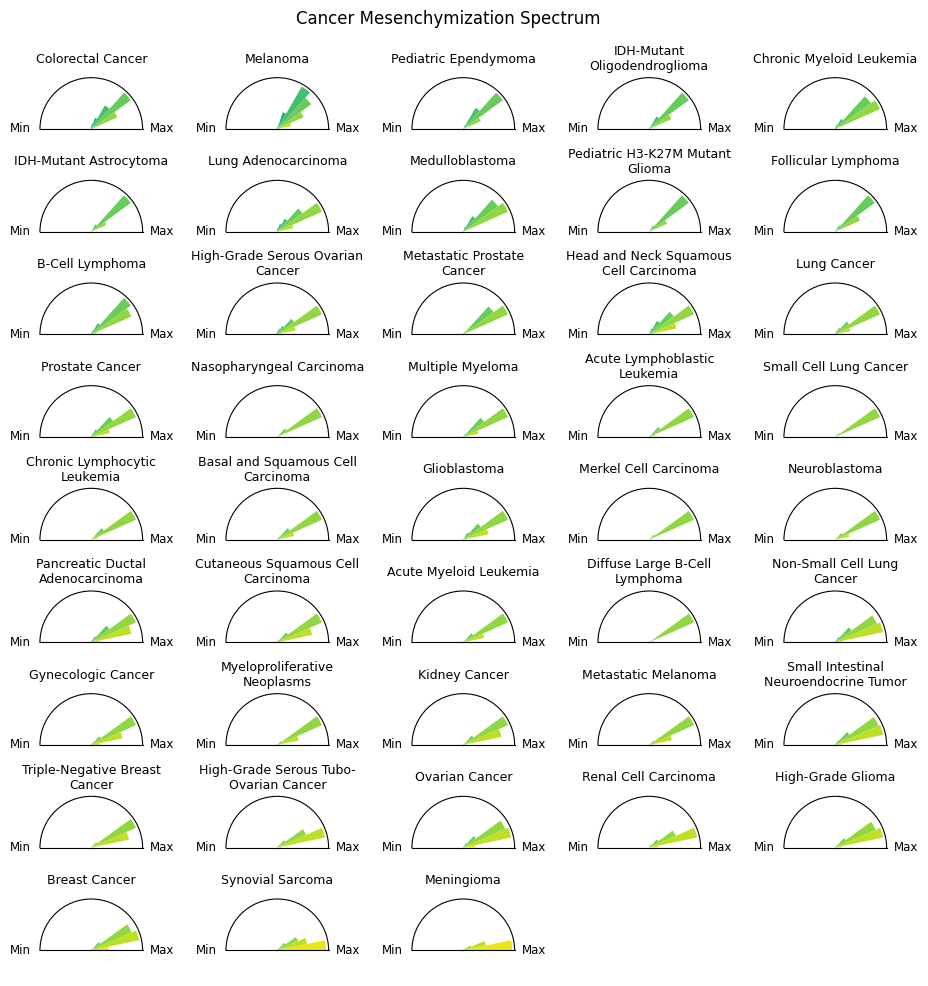

In [11]:
from matplotlib.colors import Normalize
import textwrap

n_bins, theta_lim = 15, [0, np.pi]
bins = np.linspace(*theta_lim, n_bins + 1)
locs = (bins[:-1] + bins[1:]) / 2
widths = np.diff(bins)
cmap = plt.cm.viridis
norm = Normalize(*theta_lim)
colors = [cmap(norm(l)) for l in locs]

theta_df = adata.obs.groupby('Disease').theta.mean().sort_values()
ncol = 5; nrow = theta_df.size // ncol + 1
fig, ax = plt.subplots(nrow, ncol, figsize = (12, 12), subplot_kw = {'projection' : 'polar'})
for i in range(theta_df.size):
    row_i, col_i = i // ncol, i % ncol
    ax_i = ax[row_i, col_i]
    disease_i = theta_df.index[i]
    msk_i = adata.obs.Disease.isin([disease_i])
    theta_i = adata[msk_i].obs.theta.values
    counts_i, _ = np.histogram(theta_i, bins = bins)
    bars_i = ax_i.bar(locs, counts_i, width = widths, bottom = 0)

    for b, c in zip(bars_i, colors):
        b.set_facecolor(c)
    
    ax_i.set_theta_zero_location('W')
    ax_i.set_theta_direction(-1)
    ax_i.set_thetamin(0)
    ax_i.set_thetamax(180)

    ax_i.set_yticks([])
    ax_i.set_xticks([0, np.pi], ['Min', 'Max'], fontsize = 8.5)
    
    disease_i = '\n'.join(textwrap.wrap(disease_i, width = 25))
    ax_i.set_title(disease_i, y = .85, size = 9, va = 'center')

for j in range(theta_df.size, nrow * ncol):
    row_j, col_j = j // ncol, j % ncol
    ax[row_j, col_j].set_visible(False)

fig.suptitle('Cancer Mesenchymization Spectrum', y = .915)
fig.subplots_adjust(wspace = 0, hspace = 0)
plt.show()